In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from glob import glob
from tqdm import tqdm

here, we are going to upload our text files from a local directory using glob and then iterate through the files using tqdm to show progress bars, number of iterations and time taken to run the loop of text files.

we will open the files, read them and append them to an empty list so as to create a file with all the texts.

In [3]:
#searching text files in our local directory
path = glob(r'../tochora/baba/BBC News Summary/News Articles/*/*.txt')
# creating an empty list for making a complete file of texts
news_articles = []
# iterating through the text files
for i in tqdm(path):
    #try:
        # opening and reading iterated files
        files = open(i, 'r')
        news = files.read()
        # adding text files into our empty list 
        news_articles.append(str(news))
    #except:
        #files = open(i, 'rb')
        #news = files.read()
        #news_articles.append(str(news))

100%|██████████| 1839/1839 [01:12<00:00, 25.53it/s]


Below is a smaple of text in our complete file 

In [4]:
# smaple of our complete texts
news_articles[0]


'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to si

Text cleaning

text cleaning involves removing punctuation marks, stopwords and reducing words from various forms into their basic form.Stopwords are common words in the text like prepositions, articles, interjections and various adverbs that dont have any meaningful input into our text.There is also a rare world "\n\" that need to be removed and replaced by an empty space.

we will use nltk packages to remove stopwords and wordnetLemmatizer to reduce words into their basic form.

In [5]:
# importing packages prerequisite for cleaning the text
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
lemmatizer = WordNetLemmatizer()
#creating an empty list
news_article = []
# a function to clean our text
def clean_articles(article):
    #iterating through all sentences in our file
    for articles in tqdm(news_articles):
        # removing rare word and replace it by a space
        article = articles.replace('\n', " ")
        # converting our text from proper case into lower case
        artic = article.lower()
        # splitting our sentences into list of words
        articc = artic.split()
        # removing stopwords
        arti = [w for w in articc if w not in set(stopwords.words("english"))]
        # reducing words into their basic form
        artie = [lemmatizer.lemmatize(w) for w in arti]
        # joining splitted words into a complete list
        art = " ".join(artie)
        # adding our cleaned text into an originally empty list
        news_article.append(art)
    return news_article
    

In [6]:
# a sample of cleaned text
clean_articles(news_articles[0])

100%|██████████| 1839/1839 [07:57<00:00,  3.85it/s]


['ad sale boost time warner profit quarterly profit u medium giant timewarner jumped 76% $1.13bn (â£600m) three month december, $639m year-earlier. firm, one biggest investor google, benefited sale high-speed internet connection higher advert sales. timewarner said fourth quarter sale rose 2% $11.1bn $10.9bn. profit buoyed one-off gain offset profit dip warner bros, le user aol. time warner said friday owns 8% search-engine google. internet business, aol, mixed fortunes. lost 464,000 subscriber fourth quarter profit lower preceding three quarters. however, company said aol\'s underlying profit exceptional item rose 8% back stronger internet advertising revenues. hope increase subscriber offering online service free timewarner internet customer try sign aol\'s existing customer high-speed broadband. timewarner also restate 2000 2003 result following probe u security exchange commission (sec), close concluding. time warner\'s fourth quarter profit slightly better analysts\' expectations.

Term frequency inverse document frequency(Tfidf)

tf-idf works by looking at a normalized count where each word count is divided by the number of documents this word appears in i.e If a word appears in many documents, then its inverse document frequency is close to 1. If a word appears in
just a few documents, then the inverse document frequency is much higher thus in that way, it map the importance of a word into a vector.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
#initializing a ftidvectorizer
tfid = TfidfVectorizer(max_features=10000)
# fiting the texts to make  vectors
article_v = tfid.fit_transform(news_articles)

TruncatedSVD

we will use this transformer to reduce the the linear dimensionality on matrices or vectors returned by tfidf-vetcorizer.

In [8]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD()
article_vectors = SVD.fit_transform(article_v)

Clustering

This refers to  task of dividing a population into groups such as elements or data points in  group have the same characteristics thus segregating diffrent groups from each other according to elements they have.

Kmeans clustering is an unsupervised machine learning algorithm that is tasked with grouping unlabelled data points into various various clusters as determined by the modeller.

In [9]:
# importing kmeans package
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# here we are going to initialize an iteration process that is to determine the number of clusters to be used in our model
# creating an empty list
kmeans_list = []
# iterating the clusters
for i in tqdm(range(2, 16)):
    # initiliazing the model
    km = KMeans(n_clusters=i)
    km.fit(article_vectors)
    # inertia measures how our dataset was clustered
    #appendind squared distances between data points and a centroid in our model
    kmeans_list.append(km.inertia_)



100%|██████████| 14/14 [00:05<00:00,  2.66it/s]


Below is an elbow plot that will help us to select the apropriate number of clusters where our model inertia is low.In our model, 5 clusters appear to be the optimal number.

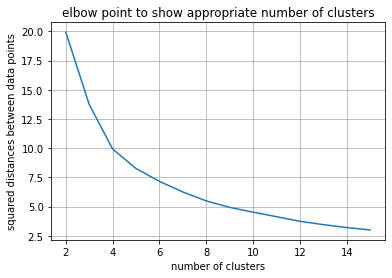

In [10]:
# plotiing an elbow plot to show appropriate number of clusters
plt.plot(range(2, 16), kmeans_list)
plt.xlabel("number of clusters")
plt.ylabel("squared distances between data points")
plt.title("elbow point to show appropriate number of clusters")
plt.grid(True)

In [11]:
# fiting our model with appropriate clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(article_vectors)
# assigning labels to various clusters in our model
labels = kmeans.labels_

Here, we are going to make a dataframe made up of news articles with the respective label of the group it belongs to.

In [12]:
import pandas as pd
# a dataframe of news articles and its label
df = pd.DataFrame({"news": news_article, "labels": labels})
df.head()

,news,labels
0,ad sale boost time warner profit quarterly pro...,3
1,dollar gain greenspan speech dollar hit highes...,0
2,yukos unit buyer face loan claim owner embattl...,3
3,high fuel price hit ba's profit british airway...,3
4,pernod takeover talk lift domecq share uk drin...,3


In [46]:
# showing the number of labelled clusters in our dataset
df.labels.value_counts()

0    493
3    403
1    368
4    302
2    273
Name: labels, dtype: int64

TSNE

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate= 'auto', init='pca') 
tsne_df = tsne.fit_transform(article_vectors)
tsne_df = pd.DataFrame(tsne_df, columns= ['column1', 'column2'])
tsne_df.head()

c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


,column1,column2
0,-45.519276,-4.364388
1,-10.233003,-37.460735
2,-34.026421,9.188604
3,-37.644310,15.694028
4,-32.344128,29.724726


Visualisation of various clusters

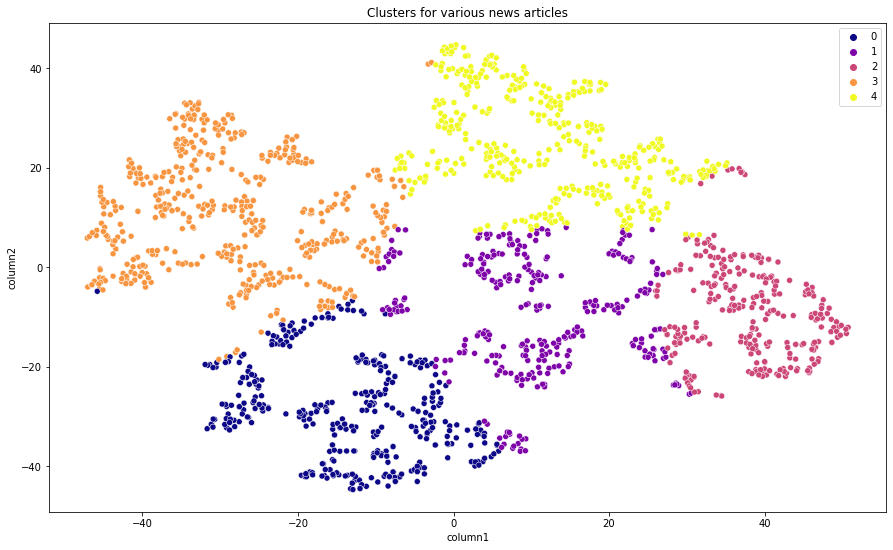

In [14]:
import seaborn as sns
plt.figure(figsize=(15,9))
sns.scatterplot(x=tsne_df['column1'],y=tsne_df['column2'],hue=labels,palette='plasma')
plt.title("Clusters for various news articles")
plt.show()